In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image,display

In [2]:
base_url='http://localhost:8000'
endpoint='/predict'
model = 'yolov3-tiny'

In [3]:
url_with_endpoint_no_params = base_url + endpoint
url_with_endpoint_no_params

'http://localhost:8000/predict'

In [4]:
full_url = url_with_endpoint_no_params + "?model=" + model
full_url

'http://localhost:8000/predict?model=yolov3-tiny'

In [7]:
def response_from_server(url, image_file, verbose=True):
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    
    if verbose:
        msg = "Everything went well!" if status_code == 200 else "There was an error when handling the request."
        print(msg)
        
    return response

In [9]:
with open('./images/clock2.jpg', 'rb') as image_file:
    prediction = response_from_server(full_url, image_file)

Everything went well!


In [10]:
dir_name = 'images_predicted'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [15]:
def display_image_from_response(response):
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    f'images_predicted/{filename}', image
    display(Image(f'images_predicted/{filename}'))
    


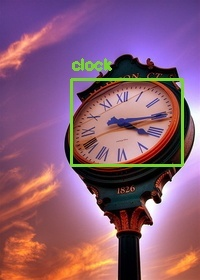

In [16]:
display_image_from_response(prediction)

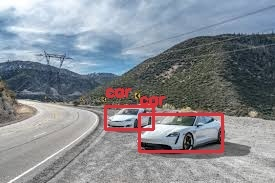

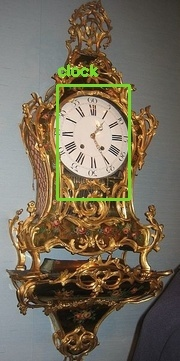

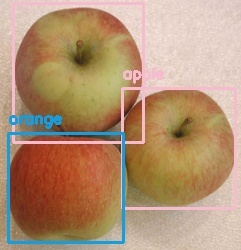

In [17]:
image_files = [
    'car2.jpg',
    'clock3.jpg',
    'apples.jpg'
]

for image_file in image_files:
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
    
    display_image_from_response(prediction)